# LGMVIP - Data Science Intern, April-2022

### AUTHOR - Karan Doke

## Advanced Level Task

## TASK-8- Next Word Prediction :
Using Tensorflow and Keras library train a RNN, to predict the next word. 

### Dataset link : 
https://drive.google.com/file/d/1GeUzNVqiixXHnTl8oNiQ2W3CynX_lsu2/view

### Importing Libraries

In [1]:
import numpy as np
np.random.seed(42)
import tensorflow as tf
tf.random.set_seed(42)
import warnings as wg
wg.filterwarnings("ignore") 
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.layers import LSTM, Dropout
from tensorflow.keras.layers import TimeDistributed
from tensorflow.keras.layers import Dense, Activation, Dropout, RepeatVector
from tensorflow.keras.optimizers import  RMSprop
import matplotlib.pyplot as plt
import pickle
import heapq

### Loading the data

In [2]:
#Loading the data
text = open('1661-0.txt', encoding="utf8").read().lower()
print('corpus length:', len(text))

corpus length: 581888


### Data Preprocessing

In [5]:
#Data Preprocessing
character = sorted(list(set(text)))
char_indices = dict((c, i) for i, c in enumerate(character))
indices_char = dict((i, c) for i, c in enumerate(character))
 
print(f'unique chars: {len(character)}')

unique chars: 73


In [6]:
#chunk 40 characters with 3 sequences
seq_len = 40
step = 3
sentences = []
next_chars = []
for i in range(0, len(text) - seq_len, step):
    sentences.append(text[i: i + seq_len ])
    next_chars.append(text[i + seq_len])
print(f'num training examples: {len(sentences)}')

num training examples: 193950


In [7]:
# generating our features and labels
#one hot encoding
X = np.zeros((len(sentences), seq_len, len(character)), dtype=np.bool)
y = np.zeros((len(sentences), len(character)), dtype=np.bool)
for i, sentence in enumerate(sentences):
    for t, char in enumerate(sentence):
        X[i, t, char_indices[char]] = 1
    y[i, char_indices[next_chars[i]]] = 1

sentences[124]
next_chars[100]

'e'

In [8]:
#one hot encoded data
X[0][0]

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True])

In [9]:
#one hot encoded data
y[0]

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False])

In [20]:
X.shape

(193950, 40, 73)

In [21]:
y.shape

(193950, 73)

### Creating the model

In [22]:
# Creating the model
model = Sequential()
model.add(LSTM(500, input_shape=(seq_len, len(character))))
model.add(Dense(len(character)))
model.add(Activation('softmax'))

### Model summary

In [23]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 500)               1148000   
                                                                 
 dense_1 (Dense)             (None, 73)                36573     
                                                                 
 activation_1 (Activation)   (None, 73)                0         
                                                                 
Total params: 1,184,573
Trainable params: 1,184,573
Non-trainable params: 0
_________________________________________________________________


### Training our model

In [24]:
# Training our model
optimizer = RMSprop(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
history = model.fit(X, y,
                    validation_split=0.01, 
                    batch_size=128,
                    epochs=10, 
                    shuffle=True).history

Epoch 1/10
1501/1501 [==============================] - 1072s 713ms/step - loss: 1.9221 - accuracy: 0.4374 - val_loss: 2.1037 - val_accuracy: 0.4314
Epoch 2/10
1501/1501 [==============================] - 1155s 770ms/step - loss: 1.5049 - accuracy: 0.5466 - val_loss: 1.9525 - val_accuracy: 0.4876
Epoch 3/10
1501/1501 [==============================] - 1354s 902ms/step - loss: 1.3913 - accuracy: 0.5767 - val_loss: 1.9369 - val_accuracy: 0.4624
Epoch 4/10
1501/1501 [==============================] - 1286s 857ms/step - loss: 1.3279 - accuracy: 0.5938 - val_loss: 1.8956 - val_accuracy: 0.4861
Epoch 5/10
1501/1501 [==============================] - 1244s 829ms/step - loss: 1.2805 - accuracy: 0.6053 - val_loss: 1.9859 - val_accuracy: 0.5062
Epoch 6/10
1501/1501 [==============================] - 1113s 741ms/step - loss: 1.2458 - accuracy: 0.6145 - val_loss: 2.0471 - val_accuracy: 0.4964
Epoch 7/10
1501/1501 [==============================] - 1100s 733ms/step - loss: 1.2091 - accuracy: 0.6247

### saving our model

In [25]:
#saving our model
model.save('nextword.h5')
pickle.dump(history, open("history.p", "wb"))

### loading our model

In [3]:
#loading our model
model = load_model('nextword.h5')
history = pickle.load(open("history.p", "rb"))

### Model Evaluation 

In [30]:
#Model Evaluation
loss_and_acc=model.evaluate(X,y)
print("Test Loss", loss_and_acc[0])
print("Test Accuracy", loss_and_acc[1])

6061/6061 [==============================] - 72s 12ms/step - loss: 1.3228 - accuracy: 0.5964
Test Loss 1.3227909803390503
Test Accuracy 0.5963547229766846


### Plotting training and validation plots

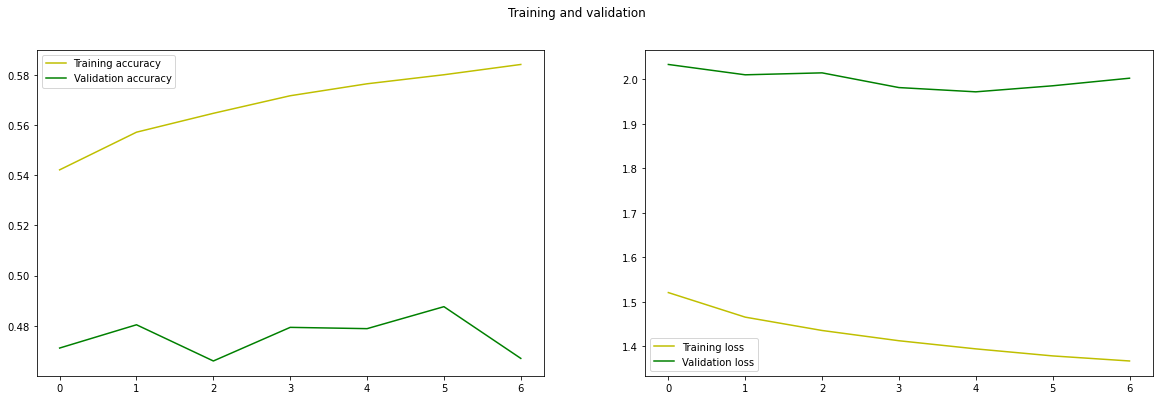

In [31]:
acc = history['accuracy']
val_acc = history['val_accuracy']
loss = history['loss']
val_loss = history['val_loss']
epochs = range(len(acc))


fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
ax[0].plot(epochs, acc, 'y', label='Training accuracy')
ax[0].plot(epochs, val_acc, 'g', label='Validation accuracy')
ax[0].legend(loc=0)
ax[1].plot(epochs, loss, 'y', label='Training loss')
ax[1].plot(epochs, val_loss, 'g', label='Validation loss')
ax[1].legend(loc=0)

plt.suptitle('Training and validation')
plt.show()

In [10]:
def prepare_input(text):
    x = np.zeros((1, seq_len, len(character)))
    for t, char in enumerate(text):
        x[0, t, char_indices[char]] = 1.
        
    return x

prepare_input("This is an example of input of our model".lower())

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])

### functions to get next probable characters

In [11]:
#functions to get next probable characters
def sample(preds, top_n=3):
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds)
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    
    return heapq.nlargest(top_n, range(len(preds)), preds.take)

In [12]:
def predict_completion(text):
    original_text = text
    generated = text
    completion = ''
    while True:
        x = prepare_input(text)
        preds = model.predict(x, verbose=0)[0]
        next_index = sample(preds, top_n=1)[0]
        next_char = indices_char[next_index]
        text = text[1:] + next_char
        completion += next_char
        
        if len(original_text + completion) + 2 > len(original_text) and next_char == ' ':
            return completion

In [13]:
def predict_completions(text, n=3):
    x = prepare_input(text)
    preds = model.predict(x, verbose=0)[0]
    next_indices = sample(preds, n)
    return [indices_char[idx] + predict_completion(text[1:] + indices_char[idx]) for idx in next_indices]

### Prediction

In [65]:
#Prediction
quotes = [   
    "It is not a lack of  love, but a  lack of friendship that makes unhappy marriages.",
    "Recurrent neural network (RNN)is a type of artificial neural network which uses sequential data or time series data.",
    "Machine learning is the science of getting computers to act without being explicitly programmed.",
    "Deep learning is subset of machine learning,which is essentially a neural network with three or more layers.",
    "The goal of AI is to  make a  compter like humans to solve complex problems.",
    "Statistics are defined as numerical data, and is the field of math that deals with the collection, tabulation and interpretation of numerical data."
    ]

In [66]:
for q in quotes:
    seq = q[:40].lower()
    print(seq)
    print(predict_completions(seq, 5))
    print()

it is not a lack of  love, but a  lack o
['f ', 'n ', 'r ', 'ut ', 'ver ']

recurrent neural network (rnn)is a type 
['the ', 'boun-mark ', 'and ', 'of ', 'upon ']

machine learning is the science of getti
['ng ', 'on ', 'an ', 's ', 'ty ']

deep learning is subset of machine learn
[' a ', 'ed ', ', ', 'g ', 'ing ']

the goal of ai is to  make a  compter li
['ke ', 'tten ', 'ps ', 'ght ', 'doness ']

statistics are defined as numerical data
['le ', '. ', ', ', '’s ', 'ry ']



# THANK YOU !!